In [22]:
#Importing required libraries
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn import svm

In [3]:
#Getting dataset
!wget -c https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -vxf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2022-05-06 10:48:57--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  97.7MB/s    in 1.7s    

2022-05-06 10:48:59 (97.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [4]:
#Function to unpickle dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#Loading data
ROOT_PATH='./'  
batch1 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_1")
batch2 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_2")
batch3 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_3")
batch4 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_4")
batch5 = unpickle(ROOT_PATH+"cifar-10-batches-py/data_batch_5")
test_batch = unpickle(ROOT_PATH+"cifar-10-batches-py/test_batch")

def load_data0(btch):
    labels = btch[b'labels']
    imgs = btch[b'data'].reshape((-1, 32, 32, 3))
    
    res = []
    for ii in range(imgs.shape[0]):
        img = imgs[ii].copy()
        img = np.fliplr(np.rot90(np.transpose(img.flatten().reshape(3,32,32)), k=-1))
        res.append(img)
    imgs = np.stack(res)
    return labels, imgs

#Function to load dataset
def load_data():
    x_train_l = []
    y_train_l = []
    for ibatch in [batch1, batch2, batch3, batch4, batch5]:
        labels, imgs = load_data0(ibatch)
        x_train_l.append(imgs)
        y_train_l.extend(labels)
    x_train = np.vstack(x_train_l)
    y_train = np.vstack(y_train_l)
    
    x_test_l = []
    y_test_l = []
    labels, imgs = load_data0(test_batch)
    x_test_l.append(imgs)
    y_test_l.extend(labels)
    x_test = np.vstack(x_test_l)
    y_test = np.vstack(y_test_l)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
xVal = x_train[49000:, :].astype(np.float)
yVal = np.squeeze(y_train[49000:, :])
xTrain = x_train[:49000, :].astype(np.float)
yTrain = np.squeeze(y_train[:49000, :])
yTest = np.squeeze(y_test)
xTest = x_test.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarnin

Train image shape:    (49000, 32, 32, 3)
Train label shape:    (49000,)
Validate image shape: (1000, 32, 32, 3)
Validate label shape: (1000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


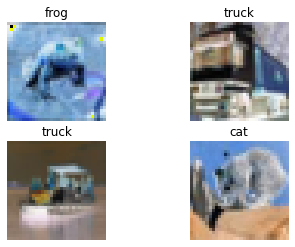

In [6]:
# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))
print ('Validate image shape: {0}'.format(xVal.shape))
print ('Validate label shape: {0}'.format(yVal.shape))
print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))

# Show some CIFAR10 images
plt.subplot(221)
plt.imshow((xTrain[0] * 255).astype(np.uint8))
plt.axis('off')
plt.title(classesName[yTrain[0]])
plt.subplot(222)
plt.imshow((xTrain[1] * 255).astype(np.uint8))
plt.axis('off')
plt.title(classesName[yTrain[1]])
plt.subplot(223)
plt.imshow((xVal[0] * 255).astype(np.uint8))
plt.axis('off')
plt.title(classesName[yVal[1]])
plt.subplot(224)
plt.imshow((xTest[0] * 255).astype(np.uint8))
plt.axis('off')
plt.title(classesName[yTest[0]])
#plt.savefig(baseDir+'svm0.png')
# plt.clf()
plt.show()
# print(xTrain[0])

In [7]:
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) 
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize 
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(49000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [8]:
#Choosing a smaller dataset
xTrain=xTrain[:10000,:]
yTrain=yTrain[:10000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)

[6 9 9 ... 1 1 5]
(10000, 3072)
(10000,)


In [9]:
#Defining Linear kernel function

def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(xTrain)
    acc_train = np.mean(Yhat_svc_linear_train == yTrain)
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(xVal)
    acc_test = np.mean(Yhat_svc_linear_test == yVal)
    
    return acc_train,acc_test

In [10]:
#Calling Linear Kernel Function

accuracy = []
c = 0.09

train_acc_l, test_acc_l = svm_linear(c)
accuracy.append(train_acc_l)
accuracy.append(test_acc_l)
print('Train Accuracy for Linear Kernel = {0:f}'.format(train_acc_l))
print('Test Accuracy for Linear Kernel = {0:f}'.format(test_acc_l)) 


Train Accuracy for Linear Kernel = 0.778900
Test Accuracy for Linear Kernel = 0.296000


In [11]:
#Defining Polynomial function

def svm_polynomial(c):

    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    svc_polynomial.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(xTrain)
    acc_train = np.mean(Yhat_svc_polynomial_train == yTrain)
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(xVal)
    acc_test = np.mean(Yhat_svc_polynomial_test == yVal)
    
    return acc_train,acc_test

In [12]:
#Calling Polynominal kernel function

c = 1

train_acc_poly,test_acc_poly = svm_polynomial(c)
accuracy.append(train_acc_poly)
accuracy.append(test_acc_poly)
print('Train Accuracy for Polynomial Kernel = {0:f}'.format(train_acc_poly))
print('Test Accuracy Polynomial Kernel= {0:f}'.format(test_acc_poly))


Train Accuracy for Polynomial Kernel = 0.715600
Test Accuracy Polynomial Kernel= 0.260000


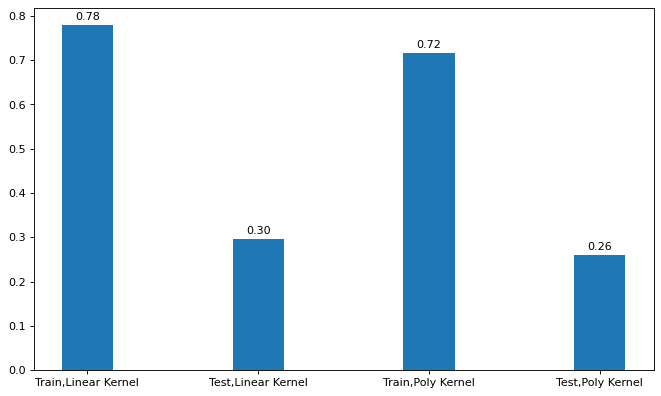

In [25]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(tags,accuracy,align='center', width=0.3)

# zip joins x and y coordinates in pairs
for x,y in zip(tags,accuracy):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()